In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("weather.csv")

In [4]:
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [5]:
df.shape

(10000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [7]:
df.isna().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
Description             0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(9999, 8)

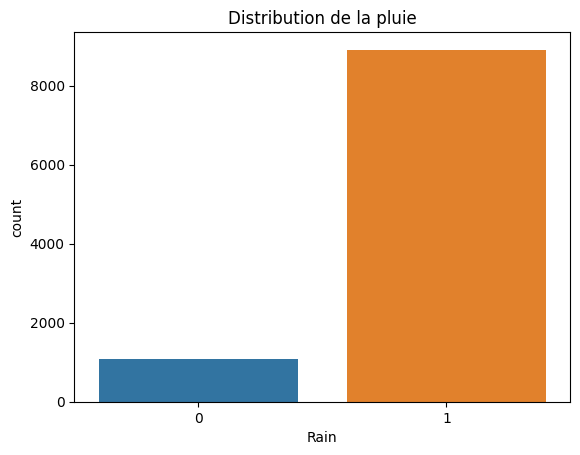

In [12]:
# Distribution de la variable cible (Rain)
sns.countplot(x='Rain', data=df)
plt.title('Distribution de la pluie')
plt.show()

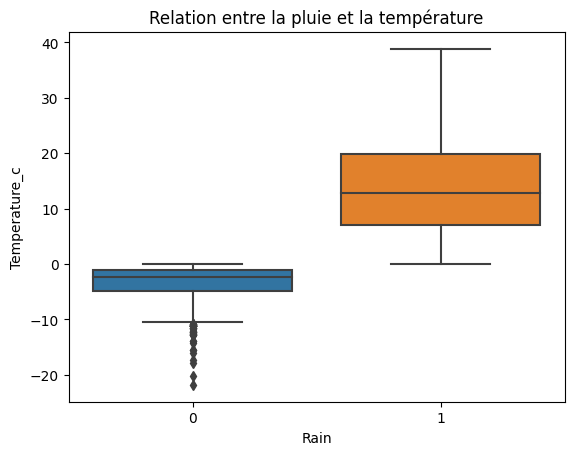

In [13]:
# Relation entre Rain et d'autres variables (par exemple, Temperature_c)
sns.boxplot(x='Rain', y='Temperature_c', data=df)
plt.title('Relation entre la pluie et la température')
plt.show()

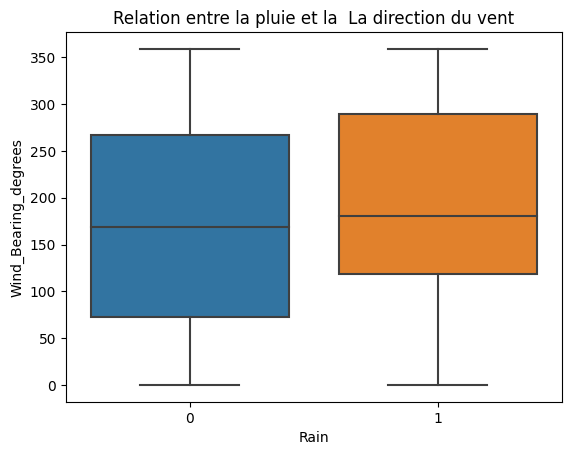

In [14]:
# Relation entre Rain et d'autres variables (par exemple, Temperature_c)
sns.boxplot(x='Rain', y='Wind_Bearing_degrees', data=df)
plt.title('Relation entre la pluie et la  La direction du vent')
plt.show()

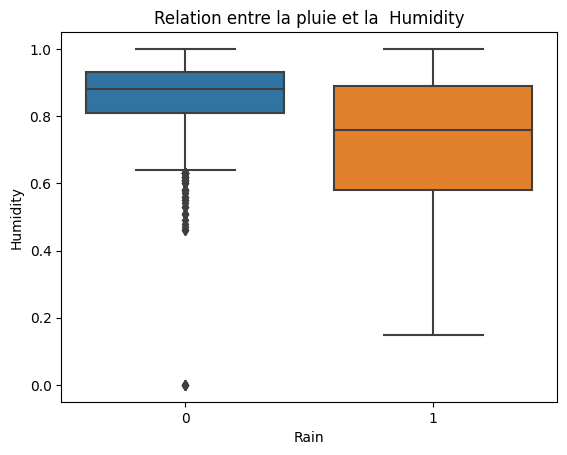

In [15]:
# Relation entre Rain et d'autres variables (par exemple, Temperature_c)
sns.boxplot(x='Rain', y='Humidity', data=df)
plt.title('Relation entre la pluie et la  Humidity')
plt.show()

In [16]:
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [17]:
df = df.drop(['Description'],axis=1)

In [18]:
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1


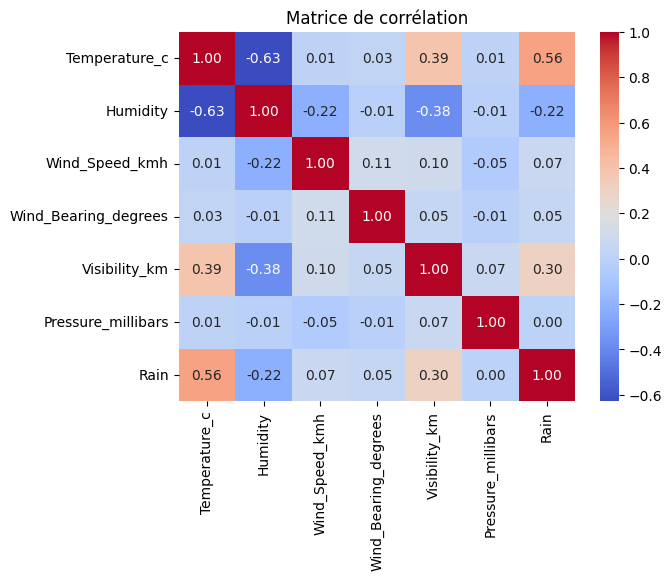

In [19]:
# Matrice de corrélation pour explorer les relations entre toutes les variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [20]:
X = df.drop(['Rain'],axis=1)
y = df['Rain']

In [21]:
y

0       0
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Rain, Length: 9999, dtype: int64

In [22]:
X

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars
0,-0.555556,0.92,11.2700,130,8.0500,1021.60
1,21.111111,0.73,20.9300,330,16.1000,1017.00
2,16.600000,0.97,5.9731,193,14.9086,1013.99
3,1.600000,0.82,3.2200,300,16.1000,1031.59
4,2.194444,0.60,10.8836,116,9.9820,1020.88
...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41
9996,8.633333,0.64,11.0446,80,9.9820,1031.33
9997,5.977778,0.93,11.0446,269,14.9086,1014.21
9998,9.788889,0.78,8.1788,231,7.8246,1005.02


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
X_train

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars
9254,13.816667,0.81,13.6528,159,16.0517,1009.66
1561,21.161111,0.87,9.3058,257,9.9015,1010.50
1670,10.994444,0.93,4.8300,150,1.8676,1017.60
6086,14.200000,0.95,3.1395,333,7.8729,1021.02
7333,16.838889,0.75,6.6332,344,15.1501,1016.95
...,...,...,...,...,...,...
5734,8.888889,0.77,9.6600,20,9.9820,1019.50
5191,7.194444,0.65,23.7153,320,10.2557,1022.81
5390,1.088889,0.92,12.5419,21,6.3434,1026.62
860,31.344444,0.34,9.6761,174,9.9820,1017.01


In [25]:
y_train

9254    1
1561    1
1670    1
6086    1
7333    1
       ..
5734    1
5191    1
5390    1
860     1
7271    1
Name: Rain, Length: 7999, dtype: int64

In [26]:
model = LogisticRegression()

In [27]:
model

LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [30]:
accuracy = accuracy_score(y_test, y_pred)


In [32]:
# Créer un DataFrame avec des valeurs pour chaque caractéristique
new_data = pd.DataFrame({
    'Temperature_c': [25.0],
    'Humidity': [0.8],
    'Wind_Speed_kmh': [15.0],
    'Wind_Bearing_degrees': [180],
    'Visibility_km': [10.0],
    'Pressure_millibars': [1010.0],
    })

# Effectuer la prédiction avec le modèle
prediction = model.predict(new_data)

# Afficher la prédiction
print("Prédiction :", prediction)


Prédiction : [1]


In [94]:
print(f'Précision du modèle : {accuracy:}')


Précision du modèle : 0.9965


In [95]:
from joblib import dump

# Enregistrez le modèle
dump(model, 'modele_prediction_pluie.joblib')


['modele_prediction_pluie.joblib']